<a href="https://colab.research.google.com/github/debi201326/Shallow-and-Deep-Learning/blob/main/SDL_Practical_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Building a Linear Regression Model Using a Single Perceptron to Predict Domino's Pizza Size (in Inches) and Price in Rupees/Dollars.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import numpy as np

In [ ]:
df = pd.read_csv('pizza_v1.csv')

In [ ]:
df['price_inr'] = df['price_rupiah'].replace({'Rp': '', ',': ''}, regex=True).astype(float) * 0.0052

In [ ]:
X = df.drop(columns=['price_rupiah', 'price_inr', 'diameter'])
y = df[['diameter', 'price_inr']]

In [ ]:
categorical_cols = ['company', 'topping', 'variant', 'size', 'extra_sauce', 'extra_cheese']
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
], remainder='passthrough')

In [ ]:
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', MultiOutputRegressor(LinearRegression()))
])

In [ ]:
pipeline.fit(X, y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['company', 'topping',
                                                   'variant', 'size',
                                                   'extra_sauce',
                                                   'extra_cheese'])])),
                ('model', MultiOutputRegressor(estimator=LinearRegression()))])

In [ ]:
y_pred = pipeline.predict(X)

In [ ]:
r2_diameter = r2_score(y['diameter'], y_pred[:, 0])
r2_price = r2_score(y['price_inr'], y_pred[:, 1])

In [ ]:
rmse_diameter = np.sqrt(mean_squared_error(y['diameter'], y_pred[:, 0]))
rmse_price = np.sqrt(mean_squared_error(y['price_inr'], y_pred[:, 1]))

In [ ]:
print(f"R² Score (Diameter):       {r2_diameter:.4f}")
print(f"R² Score (Price in INR):   {r2_price:.4f}")
print(f"RMSE (Diameter):           {rmse_diameter:.4f}")
print(f"RMSE (Price in INR):       {rmse_price:.4f}")

R² Score (Diameter):       0.9428
R² Score (Price in INR):   0.9083
RMSE (Diameter):           0.7798
RMSE (Price in INR):       70.1305


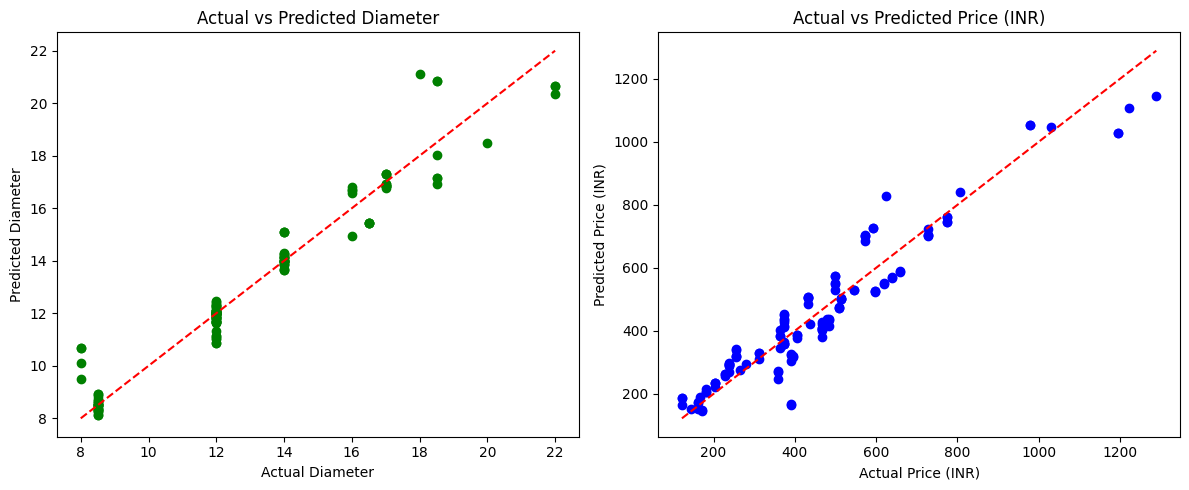

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y['diameter'], y_pred[:, 0], color='green')
plt.plot([y['diameter'].min(), y['diameter'].max()], [y['diameter'].min(), y['diameter'].max()], 'r--')
plt.title('Actual vs Predicted Diameter')
plt.xlabel('Actual Diameter')
plt.ylabel('Predicted Diameter')

plt.subplot(1, 2, 2)
plt.scatter(y['price_inr'], y_pred[:, 1], color='blue')
plt.plot([y['price_inr'].min(), y['price_inr'].max()], [y['price_inr'].min(), y['price_inr'].max()], 'r--')
plt.title('Actual vs Predicted Price (INR)')
plt.xlabel('Actual Price (INR)')
plt.ylabel('Predicted Price (INR)')

plt.tight_layout()
plt.show()